# Homework # 4 Naive BAYES Classifier

### Name: Leah Nicholson
### Instructor: Dr. Uma Gajendragadkar
### Problem: Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 
### Date: 05/25/2025
### Dataset: Diabetes dataset

This dataset consists of 768 observations and 8 numerical independent variables.<br/>
Dependent and target variable is the outcome: 1 means diabetes test result being positive, 0 means indicates negative.<br/>

**Column Descriptions:** <br/>
Pregnancies: Number of Times Being Pregnant<br/>
Glucose: Plasma Glucose Concentration (Plasma glucose concentration 2 hours after an oral glucose tolerance test)<br/>
BloodPressure: Diastolic Blood Pressure (mm Hg)<br/>
SkinThickness: Triceps Skin Fold Thickness (mm)<br/>
Insulin: 2-Hour Serum Insulin (mu U/ml)<br/>
BMI: Body Mass Index (weight in kg/(height in m)^2)<br/>
DiabetesPedigreeFunction: Diabetes Pedigree Function<br/>
Age: Age<br/>
Outcome: Class variable ( 0 - 1)<br/>

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler    # Not using MinMaxScaler, LabelEncoder, or RobustScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, cross_validate

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score


Step 1 - Write code to Read data from dataset into pandas dataframe

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


Step 2 - <br/>
a) Write code to display dataset info <br/>
b) Print 10 rows from dataset.

In [6]:
# a
print("DataFrame Shape: ", df.shape)

DataFrame Shape:  (768, 9)


In [7]:
# a, continued
df.info()    # appears to be no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# a, continued
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [9]:
#b
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [11]:
# I assume we are removing the "Pregnancies" feature to assess model performance without reproductive-related variables (as this is for Diabetes)
df = df.drop(columns = ['Pregnancies'])

Step 4 - Write code to display info of dataset and check shape of dataset.

In [13]:
# step 4 - info
df.info()   # Confirmed it no longer has Pregnancies column; no object dtype found (good - all values are int/float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [14]:
# step 4 - shape
print("DataFrame shape: ", df.shape)  # Confirmed one fewer column:  9 --> 8

DataFrame shape:  (768, 8)


Step 5 - Write code to clean data

In [16]:
# checking for missing values
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
# Replace 0 with NaN - there are hidden NaN values disguised as 0
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns:
    df[column] = df[column].replace(0, np.nan)
    

In [18]:
print("Number of NaN values after conversion:")
print(df.isnull().sum())

Number of NaN values after conversion:
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [19]:
# Calculate percent of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage.sort_values(ascending = False))

Insulin                    48.698
SkinThickness              29.557
BloodPressure               4.557
BMI                         1.432
Glucose                     0.651
DiabetesPedigreeFunction    0.000
Age                         0.000
Outcome                     0.000
dtype: float64


In [20]:
# Handle missing values
# With a small dataset of 768, I will impute values
# Using median imputation - less affected by outliers (compared to mean) - important for Naive Bayes

for column in columns:
    df[column].fillna(df[column].median(), inplace = True)

# Verifying no more NaN values:
df.isnull().sum()  # [checks out!]

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
# Checking dataset visually:
df.head(10)   # I now see for index 0, 1, 2, Insulin has values (and other datapoints were also imputed)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.000,72.000,35.000,125.000,33.600,0.627,50,1
1,85.000,66.000,29.000,125.000,26.600,0.351,31,0
2,183.000,64.000,29.000,125.000,23.300,0.672,32,1
3,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,137.000,40.000,35.000,168.000,43.100,2.288,33,1
5,116.000,74.000,29.000,125.000,25.600,0.201,30,0
6,78.000,50.000,32.000,88.000,31.000,0.248,26,1
7,115.000,72.000,29.000,125.000,35.300,0.134,29,0
8,197.000,70.000,45.000,543.000,30.500,0.158,53,1
9,125.000,96.000,29.000,125.000,32.300,0.232,54,1


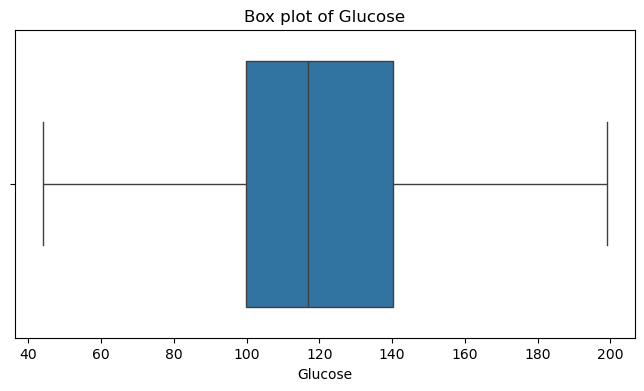

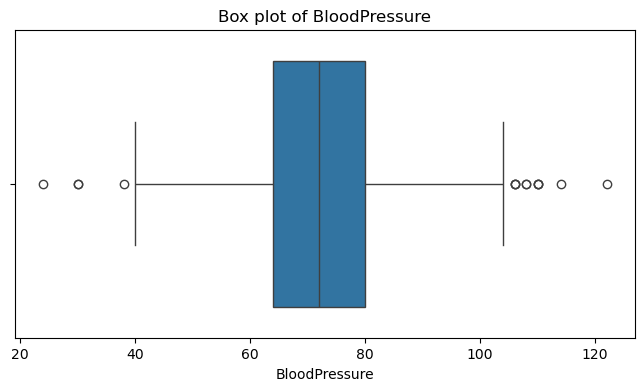

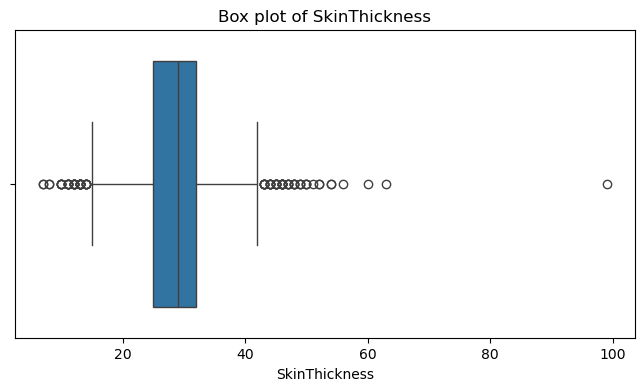

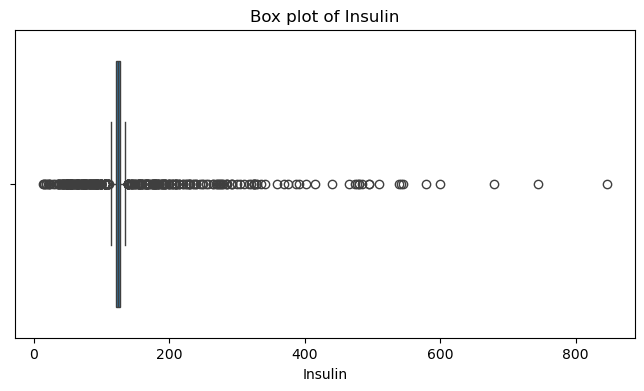

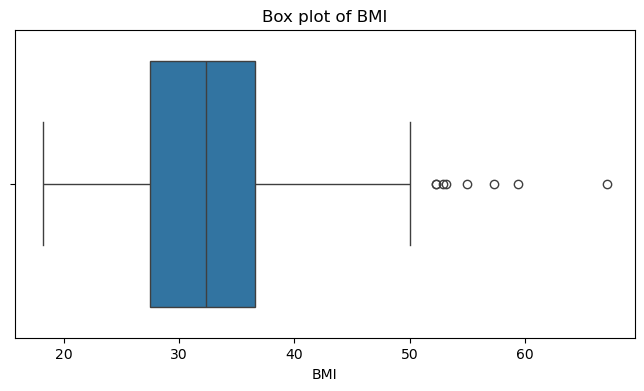

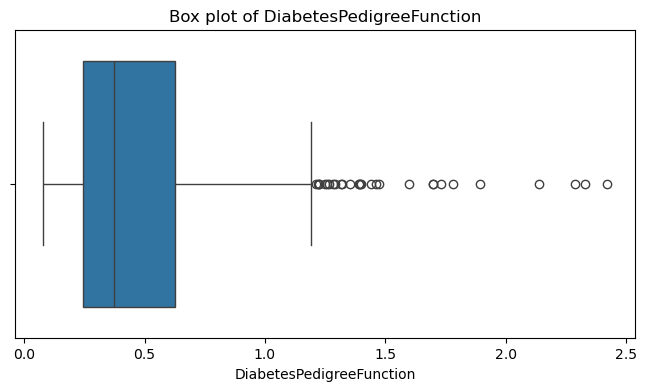

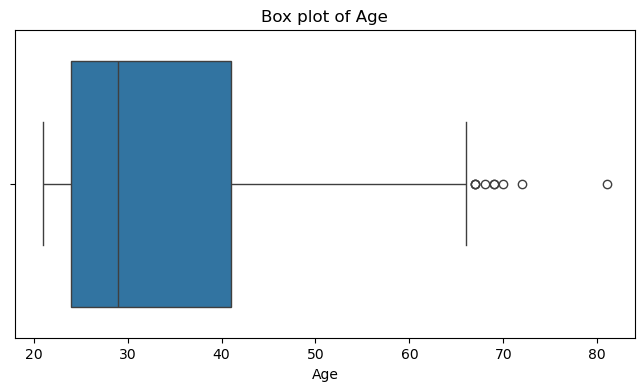

In [22]:
# Gaussian Naive Bayes assumes normal distribution
# Therefore, it is sensitive to outliers
# Viewing outliers (there's a lot!):

for col in df.columns[:-1]:        # Excluding the 'Outcome' (our target)
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()


Capped 'Glucose': Lower bound = 39.00, Upper bound = 201.00
Capped 'BloodPressure': Lower bound = 40.00, Upper bound = 104.00
Capped 'SkinThickness': Lower bound = 14.50, Upper bound = 42.50
Capped 'Insulin': Lower bound = 112.88, Upper bound = 135.88
Capped 'BMI': Lower bound = 13.85, Upper bound = 50.25
Capped 'DiabetesPedigreeFunction': Lower bound = -0.33, Upper bound = 1.20
Capped 'Age': Lower bound = -1.50, Upper bound = 66.50


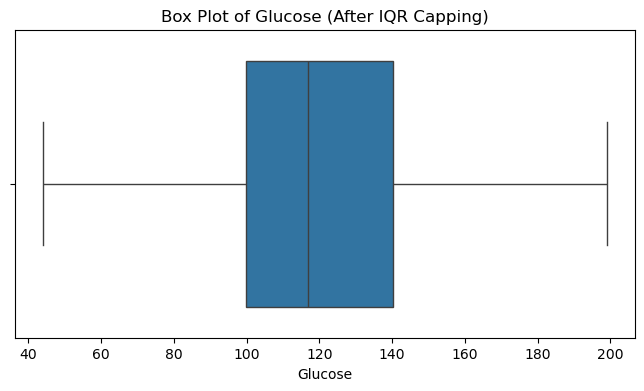

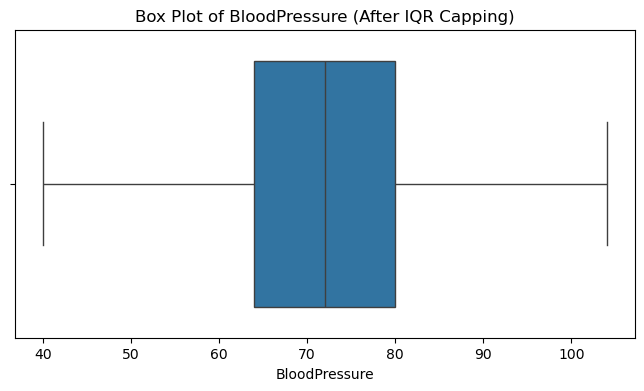

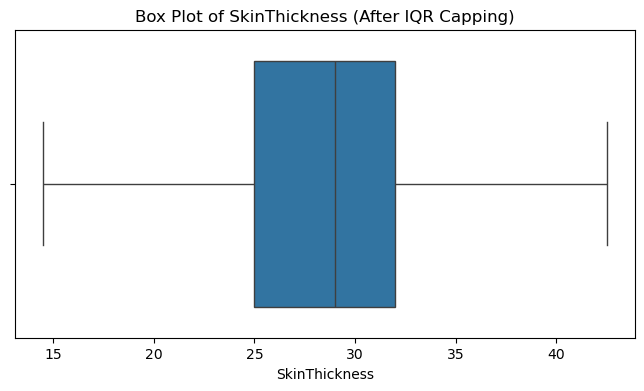

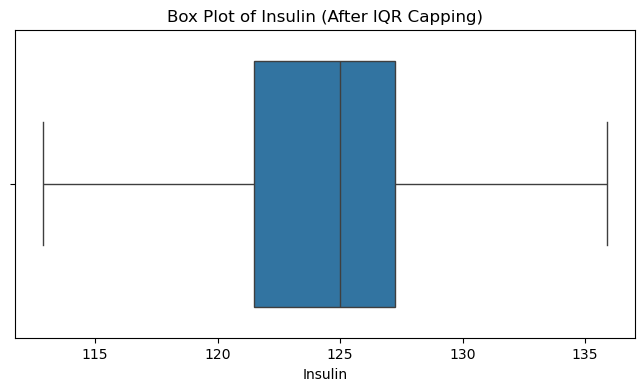

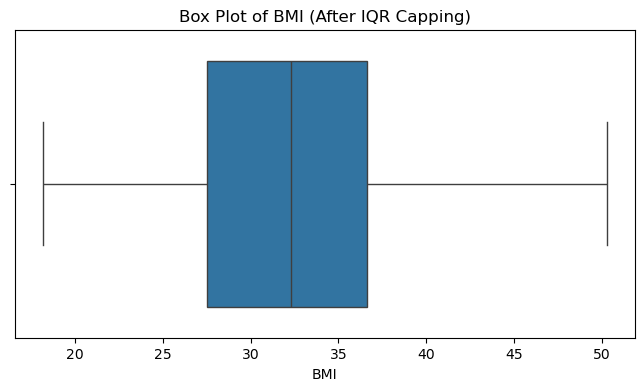

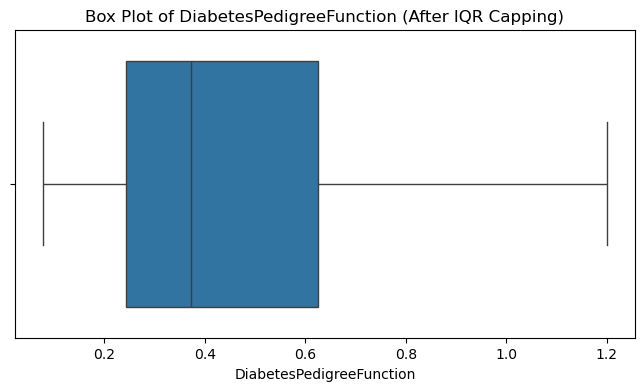

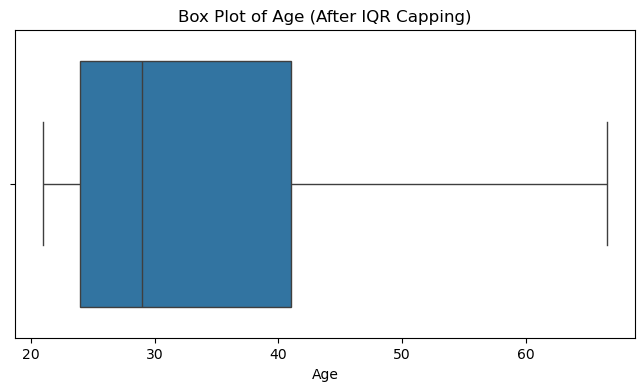

In [23]:
# Addressing those outliers:  will use IQR-based Capping


cols = ['Glucose', 'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Loop through each number-column to apply capping
for column in cols:
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection (Values outside these bounds are considered outliers)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping:
      # If value less than lower_bound, replace with lower_bound
      # If value greater than upper_bound, replace with upper_bound
      # Otherwise, keep original value
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    print(f"Capped '{column}': Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")

for column in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} (After IQR Capping)')
    plt.xlabel(column)
    plt.show()    # I see no more outliers beyond the whiskers

In [24]:
# Feature scaling - using sklearn.preprocessing module
# Since using Gaussian Naive Bayes, it will benefit from sacling
# Scaling ensures that features with larger numerical ranges does not disproportionally influence probability calculations

# Columns - for each of these I want to extract values, reshape to 2D array (sklearn), fit and transform(StandardScaler), then replace original column with scaled values
columns_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Using standard scaler (data will have mean of 0, st dev of 1):
scaler = StandardScaler()

# Apply to all number-predictor columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [25]:
# Checking results of scaling:
# Mean of each scaled column should be close to 0 [checks out!]
# St Dev should be close to 1 [checks out!]
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.349
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,0.477
min,-2.553,-2.768,-1.932,-1.494,-2.130,-1.335,-1.050,0.000
25%,-0.720,-0.715,-0.520,-0.404,-0.734,-0.754,-0.792,0.000
50%,-0.153,-0.031,0.018,0.039,-0.014,-0.303,-0.361,0.000
75%,0.611,0.654,0.421,0.324,0.631,0.586,0.671,1.000
max,2.543,2.707,1.833,1.414,2.680,2.597,2.866,1.000


In [26]:
# View changes in df
df.head(10)    # Values are smaller and centered around 0 (with negative numbers - all this is expected after standardization)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.866,-0.031,0.825,0.039,0.181,0.589,1.446,1
1,-1.205,-0.544,0.018,0.039,-0.869,-0.378,-0.189,0
2,2.017,-0.715,0.018,0.039,-1.365,0.747,-0.103,1
3,-1.074,-0.544,-0.789,-1.494,-0.644,-1.023,-1.050,0
4,0.504,-2.768,0.825,1.414,1.607,2.597,-0.017,1
5,-0.186,0.140,0.018,0.039,-1.020,-0.904,-0.275,0
6,-1.435,-1.913,0.421,-1.494,-0.209,-0.739,-0.620,1
7,-0.219,-0.031,0.018,0.039,0.436,-1.138,-0.361,0
8,2.477,-0.202,1.833,1.414,-0.284,-1.054,1.704,1
9,0.110,2.022,0.018,0.039,-0.014,-0.795,1.790,1


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [28]:
# Define features (X) 
# X has all features except our Outcome(y):
X = df.drop('Outcome', axis = 1)

# Outcome(y) is our target:
y = df['Outcome']

# Split data into training/testing sets
# test_size = 0.20 means 20% of data used for Testing and 80% for Training
# random_state ensures reproducibility of split (can be any int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30, stratify = y)

#Note to self:  the train_test_split rounds up to nearest whole number - may not get perfect split proportions but should be close
print()
print("Verifying split proportions: should be close to (80/20) split")
print("Training Percentage: ", len(X_train) / len(X))   # Training:  .80*768 = 614.4 --> 615
print("Testing Percentage: ", len(X_test) / len(X))   # Testing:  .20*768 = 153.6 --> 154
# Sanity check:  615 + 154 = 769 (rounded up - ok. Original dataset: 768)


Verifying split proportions: should be close to (80/20) split
Training Percentage:  0.7994791666666666
Testing Percentage:  0.20052083333333334


#### **Step #7: Initialize your model**




In [30]:
# Using Gaussian Naive Bayes model

model = GaussianNB()
print("GNB model successfully initialized.")

GNB model successfully initialized.


#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [32]:
# Fit starts the training process with X_train (features), y_train(corresponding target labels)
model.fit(X_train, y_train)

GaussianNB()

Step 9 - Predict using model on test data

In [34]:
# Making predictions on the Test set

predictions = model.predict(X_test)                          # Uses trained model to create label predictions for data in the X_test dataset; returns predicted class labels
prediction_probability = model.predict_proba(X_test)         # Calculate the probabilities for each class label; 

# ------------------------------------
print()
print('Models Predictions (Diabetes = 1/No Diabetes = 0) for first five people:')
print(predictions[:5])                                       # Printing predicted class labels for first 5 people

print()
print("Predicted Probabilities for the First 5 Samples (Class 0, Class 1), rounded:")
for i in range(5):
    print(f"Sample {i}:   Class 0 Probability = {prediction_probability[i][0]:.4f}   |   Class 1 Probability = {prediction_probability[i][1]:.4f}")

# NOTE:  Without rounding, some numbers look like they are above 1. These are in scientific notation - in fact, they are very much below 1 (very small numbers close to 0). 
    # So, for display I have chosen to round them to 2 decimal places.
    # Naive bayes produces probabilities for the yes/no outcome, seen in the Samples. 


Models Predictions (Diabetes = 1/No Diabetes = 0) for first five people:
[0 0 0 0 1]

Predicted Probabilities for the First 5 Samples (Class 0, Class 1), rounded:
Sample 0:   Class 0 Probability = 0.6138   |   Class 1 Probability = 0.3862
Sample 1:   Class 0 Probability = 0.6751   |   Class 1 Probability = 0.3249
Sample 2:   Class 0 Probability = 0.5905   |   Class 1 Probability = 0.4095
Sample 3:   Class 0 Probability = 0.6893   |   Class 1 Probability = 0.3107
Sample 4:   Class 0 Probability = 0.4171   |   Class 1 Probability = 0.5829


Step 10 -  Find accuracy of model

In [36]:
# Note there are two ways to do this - I did both for completeness (both will produce same output)
accuracy_score_method_1 = model.score(X_test, y_test)
print(f"Accuracy using model.score(): {accuracy_score_method_1:.4f}")

accuracy_score_method_2 = accuracy_score(y_test, predictions)
print(f"Accuracy using sklearn.metrics.accuracy_score: {accuracy_score_method_2:.4f}")

Accuracy using model.score(): 0.7792
Accuracy using sklearn.metrics.accuracy_score: 0.7792


Step 11 - Confusion Matrix

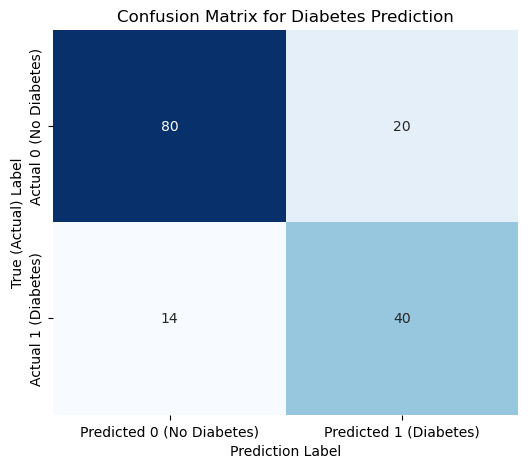

In [38]:
matrix = confusion_matrix(y_test, predictions)   # y_test are actual true labels of Test data (what outcome really was for each person), and the predictions (what model predicted for the people)

plt.figure(figsize=(6, 5))
sns.heatmap(matrix, 
            annot = True, 
            cmap = 'Blues', 
            cbar = False,
            xticklabels = ['Predicted 0 (No Diabetes)', 'Predicted 1 (Diabetes)'],
            yticklabels = ['Actual 0 (No Diabetes)', 'Actual 1 (Diabetes)'])

plt.xlabel('Prediction Label')
plt.ylabel('True (Actual) Label')
plt.title('Confusion Matrix for Diabetes Prediction')
plt.show()

# Note to self:  True Positive (top left), False Negative (top right), False Positive (bottom left), True Negative (bottom right)

For completeness, I am including Precision, Recall, F1 score:

In [40]:
# Precision, Recall, F1-Score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Precision: 0.6667
Recall:    0.7407
F1-score:  0.7018


## Final Remarks:

This model would benefit from improvement. I would try other algorithms, feature engineering, adding more data, tuning model thresholds for better recall, and balancing techniques.
Naive Bayes assumes Feature Independence, which is not fully true for this dataset.
Normal distributions (what GaussianNB assumes) might not perfectly fit all features.

Most publications show a Naive Bayes accuracy around: 70-75%, with precision/recall around: 60-70%.
To summarize, not a bad result per-se for a Naive Bayes, but a different model might be better suited for this dataset.